# Applying the fast sign gradient method against CNNs

<a href="https://colab.research.google.com/drive/17ZqlKCgnigCqDcxOM0sF2jQsCLt61bOO" target="_blank">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab">
</a>

Return to the [castle](https://github.com/Nkluge-correa/teeny-tiny_castle).

Adversarial machine learning is a specialized area within machine learning dedicated to creating algorithms and techniques capable of resisting and effectively responding to adversarial attacks. This field aims to enhance the robustness of models by understanding potential vulnerabilities and developing strategies to mitigate risks posed by malicious inputs and adversarial intent.

In this notebook we will be exploring a type of attack called evasion attacks. But _what is evasion?_ Evasion attacks happen when the network is fed an "_adversarial example_", i.e., a carefully perturbed input that looks the same as its untampered copy to a human — but that completely throws off the ML model.

![image](<https://cdn.vox-cdn.com/thumbor/uXLBjJlvk7QNC_HfXbkThG3sHPs=/0x0:652x316/1200x800/filters:focal(274x106:378x210):no_upscale()/cdn.vox-cdn.com/uploads/chorus_image/image/58191589/adversarial_patch_.0.gif>)

[Source](https://www.theverge.com/2018/1/3/16844842/ai-computer-vision-trick-adversarial-patches-google)

The attacks performed in this notebook are based in the the **Fast Gradient Sign Method** ([FGSM](https://arxiv.org/abs/1412.6572)). Our traget will be a  trained on the CIFAR-10 dataset. If you do not want to train the model, you can load the trained version in the cell below. All our trained models are in the Hub. 🤗


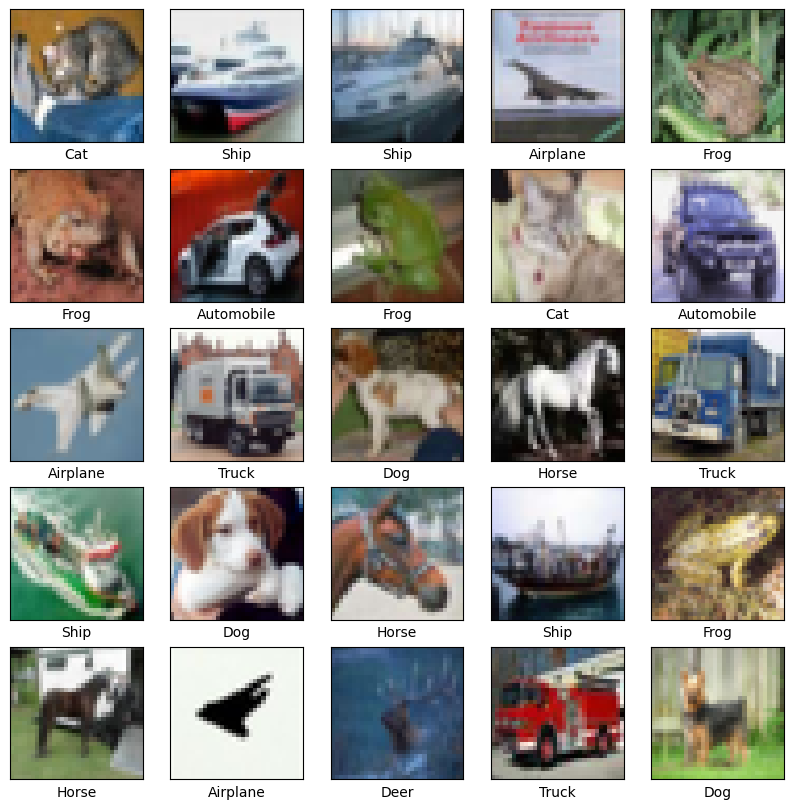

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 32, 32, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 32, 32, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 32, 32, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 32, 32, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 16, 16, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 16, 16, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 16, 16, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 16, 16, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 16, 16, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 16, 16, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 8, 8, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 8, 8, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 8, 8, 128)           │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_4                │ (None, 8, 8, 128)           │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 8, 8, 128)           │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_5                │ (None, 8, 8, 128)           │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 4, 4, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 4, 4, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 552,874 (2.11 MB)

 Trainable params: 551,722 (2.10 MB)

 Non-trainable params: 1,152 (4.50 KB)

Loss: 0.45.
Accuracy: 86.03 %.


In [13]:
!pip install huggingface_hub["tensorflow"] -q
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from huggingface_hub import from_pretrained_keras

# Download the CIFAR-10 dataset
(_, _), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()

class_names = ['Airplane', 'Automobile', 'Bird', 'Cat', 'Deer',
               'Dog', 'Frog', 'Horse', 'Ship', 'Truck']

plt.figure(figsize=[10, 10])
for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_test[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[y_test[i][0]])

plt.show()

# Load the model from the Hub
model = from_pretrained_keras("AiresPucrs/Cifar-CNN")
model.compile(
    loss=tf.keras.losses.CategoricalCrossentropy(),
    metrics=['categorical_accuracy']
    )
x_test = x_test.astype('float32')
x_test = x_test / 255.
y_test = tf.keras.utils.to_categorical(y_test, 10)
test_loss_score, test_acc_score = model.evaluate(x_test, y_test, verbose=0)
model.summary()
print(f'Loss: {round(test_loss_score, 2)}.')
print(f'Accuracy: {round(test_acc_score * 100, 2)} %.')

Now, let us write a simple function to return labels, predictions, and images.

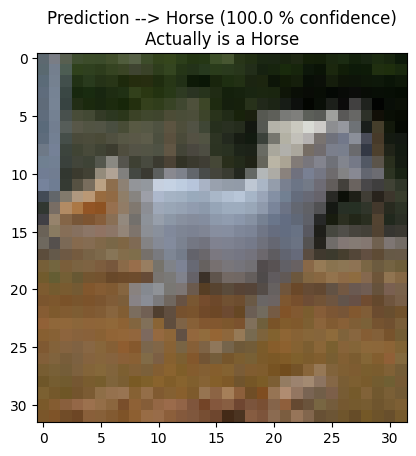

In [14]:
def predict_image(x_test, y_test, sample):
    img_tensor = np.expand_dims(x_test[sample], axis=0)
    pred = [round(num, 3) for num in list(model.predict(img_tensor, verbose=0)[0])]
    plt.figure()
    plt.imshow(x_test[sample])
    plt.title(
        f'Prediction --> {class_names[np.array(pred).argmax()]} ({round(max(pred) * 100, 2)} % confidence)\nActually is a {class_names[y_test[sample].argmax()]}')
    return plt.show()

predict_image(x_test, y_test, np.random.randint(0, 9999))

Now, we will choose a random sample and use the class [`tf.keras.losses.CategoricalCrossentropy`](https://www.tensorflow.org/api_docs/python/tf/keras/losses/CategoricalCrossentropy) to create a loss function. We will also record the class index of this specific sample.

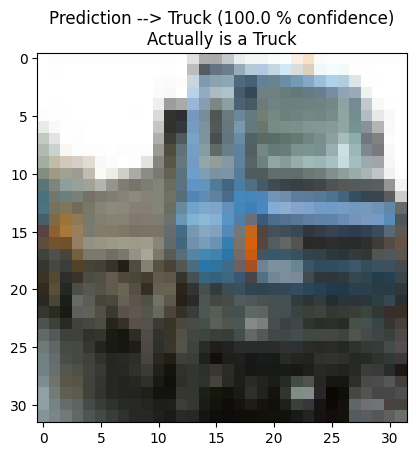

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


In [15]:

sample = np.random.randint(0, 9999)
predict_image(x_test, y_test, sample)
img_tensor = np.expand_dims(x_test[sample], axis=0)
image_probs = model.predict(img_tensor)
class_index = np.argmax(image_probs[0])

loss_object = tf.keras.losses.CategoricalCrossentropy()



We will use this loss function (rather than serving as a supervision signal for updating the parameters of a neural network), in combination with the class [`tf.GradientTape()`](https://www.tensorflow.org/api_docs/python/tf/GradientTape) to create an image (perturbation) that generates the largest possible loss (here we are moving the gradient in the direction in which the loss increases, i.e., gradient ascent) to a specific class.

And that is what the **[Fast Sign Gradient Method](https://arxiv.org/abs/1412.6572)** is all about. In essence, FGSM is to add the noise (not random noise) whose direction is the same as the gradient of the cost function concerning the data.

All this will be encapsulated by a function called `create_adversarial_pattern`.

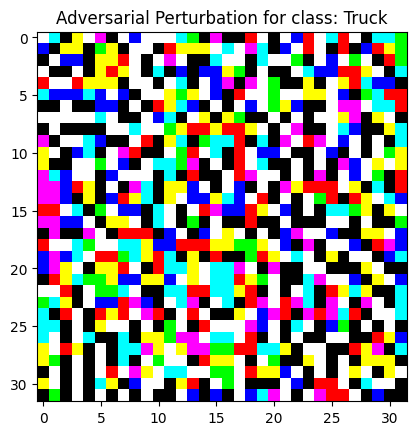

In [16]:

def create_adversarial_pattern(input_image, input_label):
    """
    Computes the adversarial perturbation of an input image using the
    given model and loss function.

    Parameters:
        input_image (tf.Tensor): The input image for which to
            compute the adversarial perturbation.
        input_label (tf.Tensor): The true label of the input image.

    Returns:
        tf.Tensor: The signed gradient of the loss with respect to
        the input image, which represents the direction in which
        the input image should be perturbed in order to increase the loss.
    """
    with tf.GradientTape() as tape:
        tape.watch(input_image)
        prediction = model(input_image)
        loss = loss_object(input_label, prediction)
    gradient = tape.gradient(loss, input_image)
    signed_grad = tf.sign(gradient)
    return signed_grad


label = tf.one_hot(class_index, image_probs.shape[-1])
label = tf.reshape(label, (1, image_probs.shape[-1]))

perturbations = create_adversarial_pattern(
    tf.convert_to_tensor(img_tensor, dtype=tf.float32), label)
adversarial_perturbation = (perturbations[0] * 0.5 + 0.5).numpy()
plt.figure()
plt.imshow(adversarial_perturbation)
plt.title(f'Adversarial Perturbation for class: {class_names[class_index]}')
plt.show()

We combine our perturbation with the original image to generate a misclassification. We will add more and more of the perturbation to the image to see the change in label prediction. The degree to which we add the adversarial perturbation is controlled by the epsilon parameter ($\epsilon$). Attackers generally focus on generating a misclassification with as little $\epsilon$ as possible.

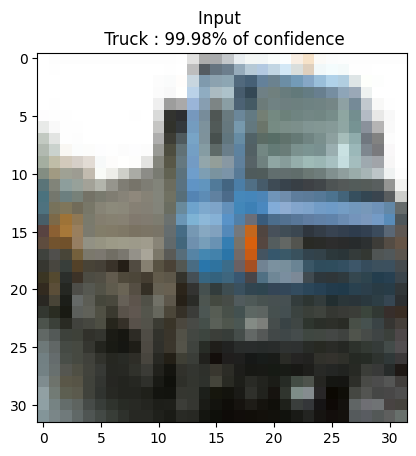

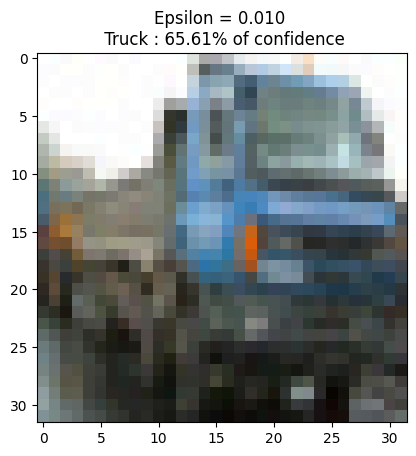

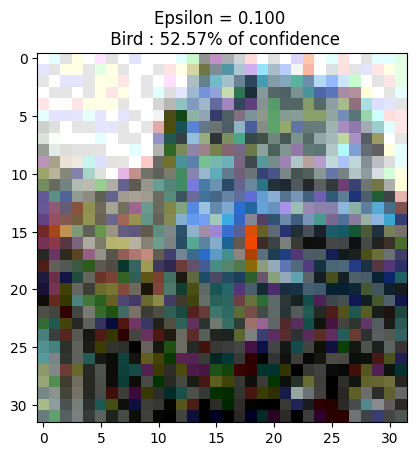

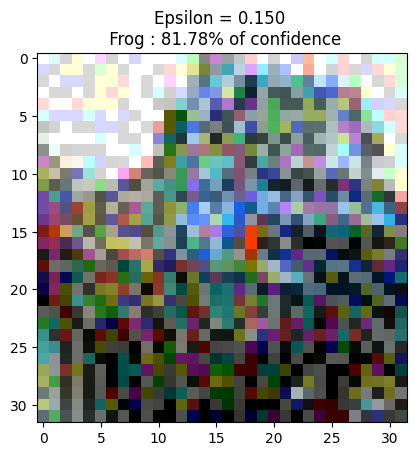

In [17]:
def display_images(img_tensor, description):
    image_probs = model.predict(
        tf.convert_to_tensor(img_tensor, dtype=tf.float32), verbose=0)
    class_confidence = image_probs.max()
    class_index = np.argmax(image_probs[0])
    plt.figure()
    plt.imshow(img_tensor[0])
    plt.title('{} \n {} : {}% of confidence'.format(description,
                                                   class_names[class_index], round(class_confidence * 100, 2)))
    plt.show()


epsilons = [0, 0.01, 0.1, 0.15]
descriptions = [('Epsilon = {:0.3f}'.format(eps) if eps else 'Input')
                for eps in epsilons]

for i, eps in enumerate(epsilons):
    adv_x = img_tensor + eps*perturbations
    adv_x = tf.clip_by_value(adv_x, 0, 1)
    display_images(adv_x, descriptions[i])

Adversarial attacks pose a significant challenge in machine learning, particularly in real-world applications, where accurate classifications are vital. Preventing misclassifications—like mistaking a rifle for a dragonfly or a pony—is essential to maintaining the reliability and accuracy of these models.

----

Return to the [castle](https://github.com/Nkluge-correa/teeny-tiny_castle).